[Home](../README.md)

### Model Training - Multiple Variable Linear Regression

Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. This Jupiter Notebook shows how I've trained a linear regression algorithm on the features I engineered to see how closely I can predict the gross revenue based on various features.


#### Step 1

Load the required dependencies:

In [13]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle
data_frame = pd.read_csv("training_data.csv")

#### Step 2 

Store the data columns for Multiple Variable Linear Regression.

In [14]:
# Create a data frame from the csv file
training_data = pd.read_csv('training_data.csv')

x_name = [
    'budget', 'release_quarter', 'rating', 'is_sequel', 'runtime',
    'genre_Action', 'genre_Adventure', 'genre_Animation', 'genre_Biography', 'genre_Comedy',
    'genre_Crime', 'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_Horror',
    'genre_Music', 'genre_Musical', 'genre_Mystery', 'genre_Romance', 'genre_Sci-Fi',
    'genre_Sport', 'genre_Thriller', 'genre_Western'
]
y_name = 'gross'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

#### Step 3

Plot the feature `x` and target `y` data on a graph using the column headings as the graph labels.

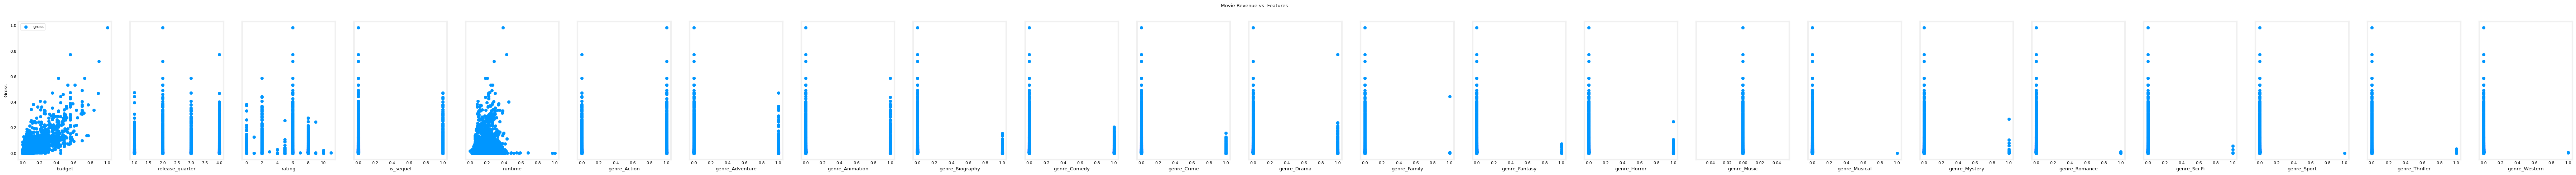

In [15]:
# plot predictions and targets vs original features    
fig, ax = plt.subplots(1, len(x_name), figsize=(len(x_name) * 4, 5), sharey=True)  # Increase figure size
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'gross')
    ax[i].set_xlabel(x_name[i])
ax[0].set_ylabel("Gross"); ax[0].legend();
fig.suptitle("Movie Revenue vs. Features")
plt.show()

#### Step 4 

Use the [Scikit-learn](https://scikit-learn.org/stable/) library to instantiate a Machine Learning model class and store it in the `my_model` variable as an object.

In [16]:
# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(x, y)

LinearRegression()

#### Step 5

Plot the features, targets and model


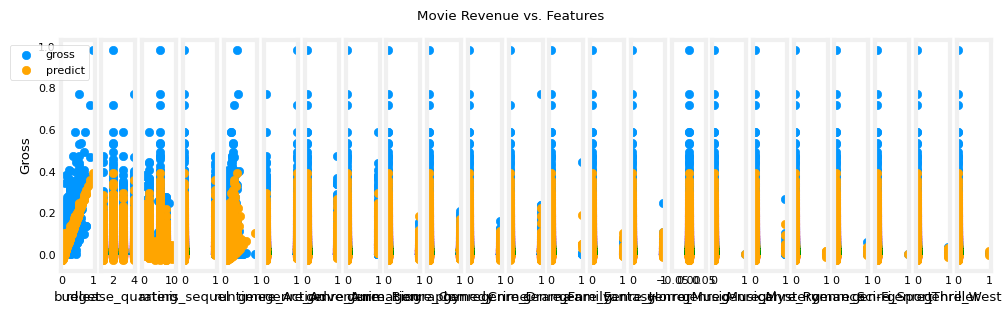

In [17]:
# scatter plot predictions and targets vs original features    
y_pred = my_model.predict(x)
fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y, label = 'gross')
    ax[i].set_xlabel(x_name[i])
    ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
ax[0].set_ylabel("Gross"); ax[0].legend();
fig.suptitle("Movie Revenue vs. Features")
plt.show()

#### Step 6

Save the model to disk

In [18]:
filename = 'my_saved_model_v1.sav'
pickle.dump(my_model, open('../Model_Testing_and_Validation/' + filename, 'wb'))